## Customer Churn Prediction

### Classification Project

### Contents

1.Introduction

2.Goal of The Project

3.General View of Data

4.Data Cleaning

5.Exploring the Data

6.Building Models

7.Results

### 1. Introduction

Classification is technique to categorize our data into a desired and distinct number of classes where we can assign label to each class. Classification is can be such as binary and multiclass. Our project is binary classsification.

The target value is "Churn" column that we will predict in this project.
Churn or customer attrition is simply defined as the number or percentage of customers lost within a specific period of time.

### 2. Goal of The Project
Customer churn prediction is an essential requirement for a successful business recently. Statistically 59% of customers don’t return after a bad customer service experience. In addition, cost of acquiring new customers is quite high. For these reasons, I have decided to worked on this topic. Thus we will learn, how we can create a classification model and predict customer's attrition step by step.

### 3. General View of Data

The data set includes information about:

Customers who left within the last month – the column is called Churn.
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
Demographic info about customers – gender, age range, and if they have partners and dependents.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings('ignore')

In [2]:
telco=pd.read_csv('../telco_customer_churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### 4. Data Cleaning

In [4]:
# Although,TotalCharges should be numerical data type,but it is object type here. Let's convert.
telco.TotalCharges=pd.to_numeric(telco.TotalCharges,errors='coerce')
#Number of the null values in all columns
def null_values(telco):
    nv=pd.concat([telco.isnull().sum(), 100 * telco.isnull().sum()/telco.shape[0]],
    axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(telco)

,Missing_Records,Percentage (%)
TotalCharges,11,0.156183


In [5]:
ind=telco[telco.TotalCharges.isnull()].index
telco.iloc[ind,[5,18,19,20]]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,NaN,No
753,0,20.25,NaN,No
936,0,80.85,NaN,No
1082,0,25.75,NaN,No
1340,0,56.05,NaN,No
3331,0,19.85,NaN,No
3826,0,25.35,NaN,No
4380,0,20.00,NaN,No
5218,0,19.70,NaN,No
6670,0,73.35,NaN,No


In [6]:
# Also,we can drop null values and customerID column.
telco=telco.fillna(0)
telco=telco.drop(['customerID'],axis=1)

In [7]:
target=['Churn']
categorical=telco.select_dtypes(include='object').columns.tolist()
categorical=[x for x in categorical if x not in target]
numeric=telco.dtypes[telco.dtypes!=object].keys().tolist()

### 5. Exploring the Data

Our purpose here, mostly, understanding which and how variables are related to 'Churn'. Who wants to leave the telecom service company and why? So we made it 'Churn' oriented.

Customer churn is the loss of clients or customers.

In [8]:
print('Total Churn Number is',telco.Churn.value_counts()[1])

Total Churn Number is 1869


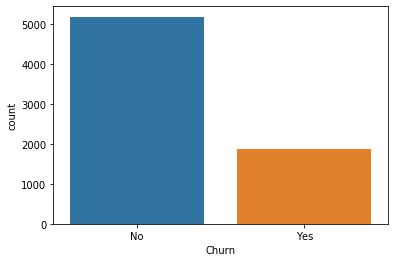

Customer Attrition ratio: %26.54


In [9]:
sns.countplot(x='Churn',data=telco)
plt.show()
print('Customer Attrition ratio: %{:.2f}'.format(len(telco[telco.Churn=='Yes'])/len(telco)*100))

### Gender

In [10]:
telco['Churn_Rate']=telco['Churn'].replace("No", 0).replace("Yes", 1)
grp=telco.groupby(['Churn_Rate','gender'])["gender"].count()

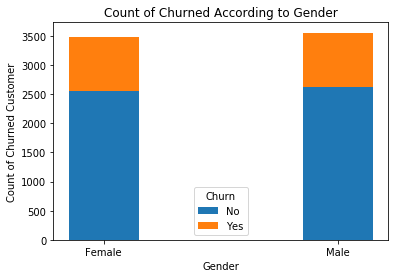

Gender Counter({'Male': 3555, 'Female': 3488})


In [11]:
plt.bar(telco.gender.unique(),grp[0],0.3)
plt.bar(telco.gender.unique(),grp[1], 0.3,bottom=grp[0])
plt.ylabel("Count of Churned Customer")
plt.xlabel("Gender")
plt.title("Count of Churned According to Gender")
plt.legend(("No", "Yes"),title='Churn')
plt.show()
print('Gender', collections.Counter(telco['gender']))

In [12]:
# Gender is ineffective for prediction of customer churn. Count of males and females who cancelled the contract
# is approximately same.
telco[telco.Churn=='Yes']['gender'].value_counts()

Female    939
Male      930
Name: gender, dtype: int64

### Partner

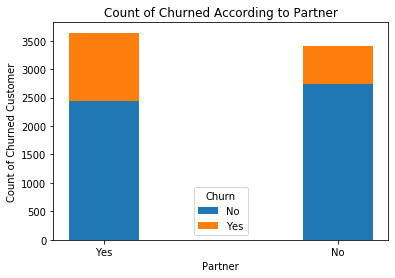

No     3641
Yes    3402
Name: Partner, dtype: int64


In [13]:
# Whether the customer has partner or not does seem to have some effect on the churn
partner_p =telco.groupby(['Churn_Rate','Partner'])["Partner"].count()
plt.bar(telco.Partner.unique(),partner_p[0],0.3)
plt.bar(telco.Partner.unique(),partner_p[1], 0.3,bottom=partner_p[0])
plt.ylabel("Count of Churned Customer")
plt.xlabel("Partner")
plt.title("Count of Churned According to Partner")
plt.legend(("No", "Yes"),title='Churn')
plt.show()
print(telco['Partner'].value_counts())

### Phone Service - Streaming TV - MultipleLines

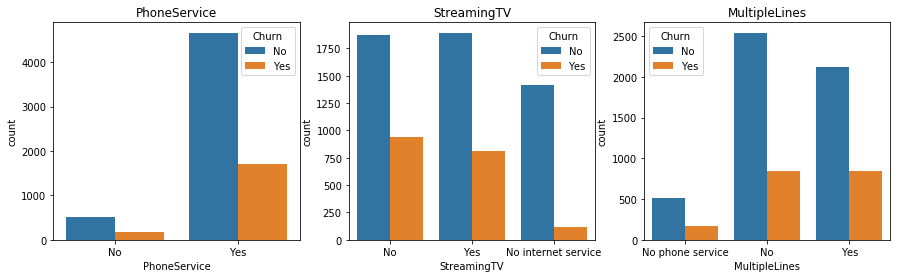

In [14]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.title("PhoneService")
sns.countplot(x='PhoneService',hue='Churn',data=telco)
plt.subplot(132)
plt.title("StreamingTV")
sns.countplot(x='StreamingTV',hue='Churn',data=telco)
plt.subplot(133)
plt.title("MultipleLines")
sns.countplot(x='MultipleLines',hue='Churn',data=telco)
plt.show()

Whether customer have Phone Service or not does not seem to have an effect on the churn.

Whether customer signed up for MultipleLines or not does not seem to have an effect on the churn.

### Online Security and Tech Support

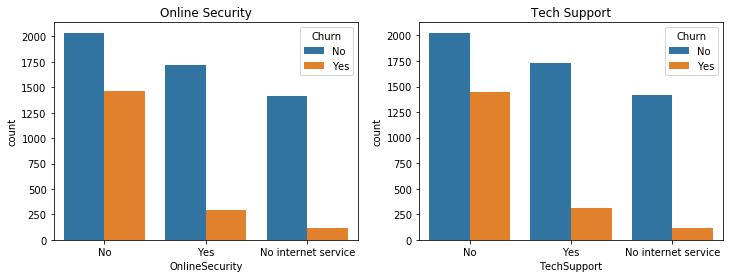

In [15]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
plt.subplot(121)
plt.title("Online Security")
axis[0] = sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = telco)
plt.subplot(122)
plt.title("Tech Support")
axis[1] = sns.countplot(x = 'TechSupport', hue = 'Churn', data = telco)

In [16]:
# Customers who did not sign up for OnlineSecurity are most likely to churn.
print('Churn Ratios by Online Security','\n')
print(round(telco[telco['Churn']=='Yes']['OnlineSecurity'].value_counts() / telco['OnlineSecurity'].value_counts()*100,2))

Churn Ratios by Online Security 

No                     41.77
Yes                    14.61
No internet service     7.40
Name: OnlineSecurity, dtype: float64


In [17]:
# Customers who did not sign up for TechSupport are most likely to churn.
print('Churn Ratios by Tech Support','\n')
print(round(telco[telco['Churn']=='Yes']['TechSupport'].value_counts() / telco['TechSupport'].value_counts()*100,2))

Churn Ratios by Tech Support 

No                     41.64
Yes                    15.17
No internet service     7.40
Name: TechSupport, dtype: float64


### Tenure

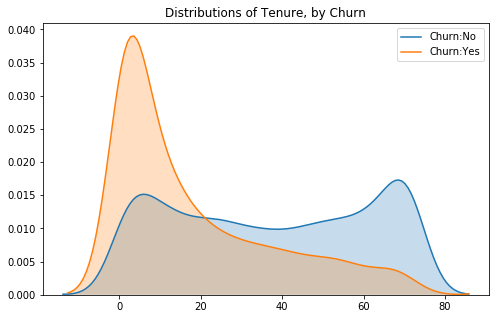

In [18]:
# Not churned customers have a much longer average tenure (20 months) than the churned customers.
churn_tenure=telco[telco.Churn=='Yes']['tenure']
not_churn_tenure=telco[telco.Churn=='No']['tenure']
plt.figure(figsize=(8,5))

sns.kdeplot(data=not_churn_tenure,label='Churn:No',shade=True)
sns.kdeplot(data=churn_tenure,label='Churn:Yes',shade=True)

plt.title("Distributions of Tenure, by Churn")
plt.show()

### Monthly Charges

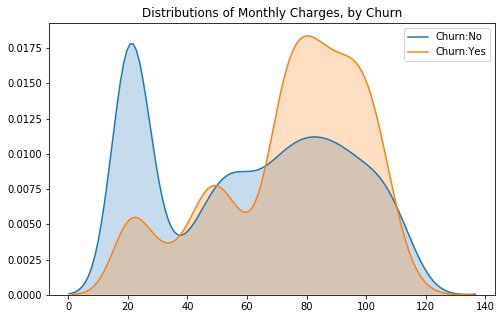

In [19]:
churn_mcharge=telco[telco.Churn=='Yes']['MonthlyCharges']
not_churn_mcharge=telco[telco.Churn=='No']['MonthlyCharges']
plt.figure(figsize=(8,5))

sns.kdeplot(data=not_churn_mcharge,label='Churn:No',shade=True)
sns.kdeplot(data=churn_mcharge,label='Churn:Yes',shade=True)

plt.title("Distributions of Monthly Charges, by Churn")
plt.show()

In [20]:
print('Average Monthly Fee of Churned')
print(round(telco[telco.Churn=='Yes']['MonthlyCharges'].mean(),2),'\nAverage Monthly Fee of Not Churned')
print(round(telco[telco.Churn=='No']['MonthlyCharges'].mean(),2))

Average Monthly Fee of Churned
74.44 
Average Monthly Fee of Not Churned
61.27


Churned customers paid over 20% higher on average monthly fee than not-churned customers.

### Senior Citizen-Tenure-Monthly Charges

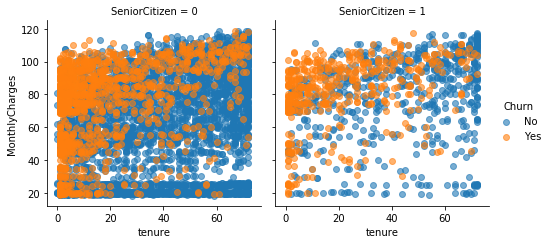

In [21]:
g=sns.FacetGrid(telco,col='SeniorCitizen', hue='Churn',height=3.5)
g.map(plt.scatter, 'tenure', 'MonthlyCharges', alpha=0.6)
g.add_legend();

In [22]:
#SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
print('SeniorCitizens percentage of customers: % {:.2f}'.format(len(telco[telco.SeniorCitizen==1])/len(telco.SeniorCitizen)*100))
print('SeniorCitizens churn rate: % {:.2f}'.format(len(telco[(telco.SeniorCitizen==1) & (telco.Churn=='Yes')])/len(telco[telco.SeniorCitizen==1])*100))
print('non-SeniorCitizens churn rate: % {:.2f}'.format(len(telco[(telco.SeniorCitizen==0) & (telco.Churn=='Yes')])/len(telco[telco.SeniorCitizen==0])*100))

SeniorCitizens percentage of customers: % 16.21
SeniorCitizens churn rate: % 41.68
non-SeniorCitizens churn rate: % 23.61


### Contract-Internet Service-Churn

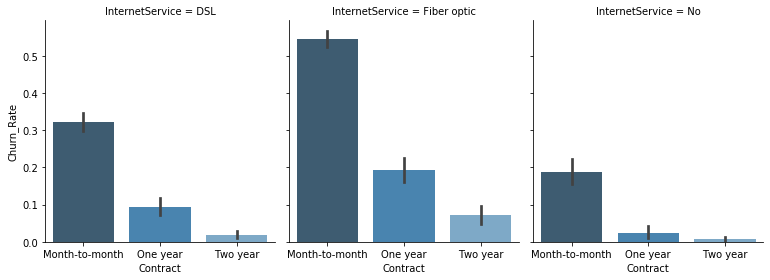

In [23]:
# Customers with Fiber optics are more probable to churn
# Short term contracts have higher churn rates
g = sns.FacetGrid(telco,col='InternetService',height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "Churn_Rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

It is obvious that contract term does have an effect on churn.There were very few churns when customers have a two-year contract. And most churns occurred on customers with a month-to-month contract.

It seems customers who signed up for Fiber optic are most likely to churn.

In [24]:
def class_tenure(telco):
    if telco['tenure']<=12 :
        return 1
    elif (telco['tenure']>12) & (telco['tenure']<=24):
        return 2
    elif (telco['tenure']>24) & (telco['tenure']<=36):
        return 3
    elif (telco['tenure']>36) & (telco['tenure']<=48):
        return 4
    elif (telco['tenure']>48) & (telco['tenure']<=60):
        return 5
    elif telco['tenure']>60:
        return 6
telco['class_tenure']=telco.apply(lambda telco: class_tenure(telco),axis=1)

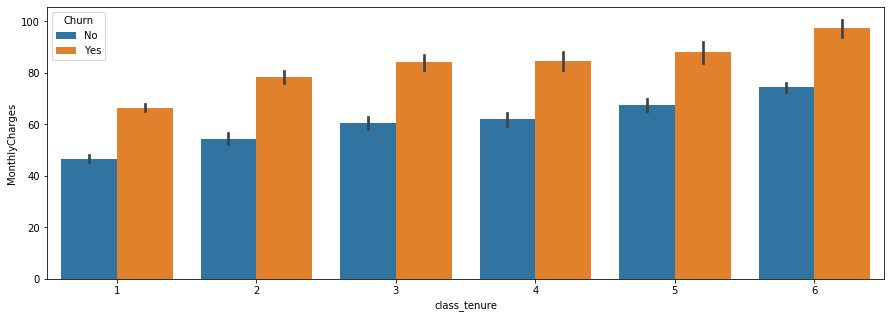

In [25]:
plt.figure(figsize=(15,5))
sns.barplot('class_tenure','MonthlyCharges',hue= 'Churn',data=telco)
plt.show()

In [26]:
group_charge = telco['MonthlyCharges'].groupby((telco['class_tenure'],telco['Churn']))
print('Sum of Churned Count by Tenure:\n', '--'*10, '\n' ,group_charge.count())

Sum of Churned Count by Tenure:
 -------------------- 
 class_tenure  Churn
1             No       1149
              Yes      1037
2             No        730
              Yes       294
3             No        652
              Yes       180
4             No        617
              Yes       145
5             No        712
              Yes       120
6             No       1314
              Yes        93
Name: MonthlyCharges, dtype: int64


In first year, count of the Churned and Not Churned are close to each other. In the later years,the Not Churned customers are more than Churned customers. 

### 6. Building Models

####  Preparation

In [27]:
telco.Churn=telco.Churn.replace({"Yes":1, "No":0})
# Drop unused columns
telco=telco.drop(columns=['Churn_Rate'],axis=1)

In [28]:
telco2=pd.concat([telco,pd.get_dummies(telco[categorical])],axis=1).drop(telco[categorical],axis=1)

In [29]:
telco2.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,class_tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,3,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


#### Is data balanced or imbalanced?

In [30]:
telco2.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [31]:
print("Percentage of Churned(Yes)     Customer:%",round(telco.Churn.value_counts()[1]/telco.shape[0]*100,2))
print("Percentage of Not Churned(No)  Customer:%",round(telco.Churn.value_counts()[0]/telco.shape[0]*100,2))

Percentage of Churned(Yes)     Customer:% 26.54
Percentage of Not Churned(No)  Customer:% 73.46


Target variable is a bit of imbalanced. We should resample the data.

Also, we will use Synthetic Sample Generation methods such as SMOTE and ADASYN.

In [32]:
X=telco2.drop('Churn',axis=1)
y=telco2.Churn

#### Standart Scale
Generally, most of the datasets have very different scales and contain some very large outliers. These two characteristics lead to difficulties to visualize the data and, more importantly, they can degrade the predictive performance of many machine learning algorithms.

In [33]:
# Let's apply StandartScaler to our data only for features.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

###  Logistic Regression with Grid Search
Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [35]:
# Create hyperparameter options
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2'],'solver': ('linear', 'lbfgs', 'liblinear')}

In [36]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=logistic,
                       param_grid = parameters,
                       cv = 10)
grid_cv.fit(X, y)
print("The best parameters : ", grid_cv.best_params_)
print("The best score         : ", grid_cv.best_score_)

The best parameters :  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
The best score         :  0.8069003868471954


In [37]:
def create_model(X,y,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logistic = LogisticRegression(solver='liblinear',penalty='l1',C=0.1)
    logistic.fit(X_train, y_train)
    
    prediction_train=logistic.predict(X_train)
    prediction_test=logistic.predict(X_test)
    
    prediction_test_prob = logistic.predict_proba(X_test)[:,1]
    
    d = pd.Series({'Accuracy_Train':accuracy_score(y_train,prediction_train),
                   'Precision_Train':precision_score(y_train,prediction_train),
                   'Recall_Train':recall_score(y_train,prediction_train),
                   'F1 Score_Train':f1_score(y_train,prediction_train),
                   'Accuracy_Test':accuracy_score(y_test,prediction_test),
                   'Precision_Test':precision_score(y_test,prediction_test),
                   'Recall_Test':recall_score(y_test,prediction_test),
                   'F1 Score_Test':f1_score(y_test,prediction_test),
                   'AUC Score':roc_auc_score(y_test, prediction_test_prob)},name=tip)
    return d

In [38]:
metrics=pd.DataFrame()

In [39]:
metrics=metrics.append(create_model(X_scl,y,tip='Logistic_Regr.'))
metrics.iloc[[0], [1, 2]]

,Accuracy_Test,Accuracy_Train
Logistic_Regr.,0.805536,0.804402


### Logistic Regression with Cross Validation

Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data.

In [40]:
from sklearn.model_selection import cross_validate, cross_val_score

In [41]:
lrm = LogisticRegression(solver='liblinear',penalty='l1',C=0.1)
cv = cross_validate(estimator=lrm,
                     X=X_scl,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Train Scores          : ', cv['train_score'], sep = '\n')

Test Scores            : 
[0.7929078  0.81276596 0.80567376 0.82528409 0.78409091 0.79403409
 0.81676136 0.80539773 0.80113636 0.80965909]
--------------------------------------------------
Train Scores          : 
[0.80672136 0.80514358 0.80514358 0.80407004 0.8086449  0.80754062
 0.80470106 0.80533207 0.80785613 0.80643635]


In [42]:
print('Mean of Test Sets : ', cv['test_score'].mean())
print('Mean of Train Sets : ', cv['train_score'].mean())

Mean of Test Sets :  0.8047711154094133
Mean of Train Sets :  0.8061589684259353


Default value of scoring compute the accuracy score of test and train sets.
Train-test split and cross validation techniques have given almost same results.

### Resampling

In [43]:
from sklearn.utils import resample
churned_customer=telco2[telco2.Churn==1]
notchurned_customer=telco2[telco2.Churn==0]
churned_customer_resample= resample(churned_customer,
                                     replace = True,
                                     n_samples = len(notchurned_customer),
                                     random_state = 111)

resample_df = pd.concat([notchurned_customer, churned_customer_resample])
resample_df.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [44]:
X = resample_df.drop('Churn', axis=1)
y = resample_df['Churn']
metrics=metrics.append(create_model(X,y,'Resampled_Logistic'))

### Logistic Regression with SMOTE

In [45]:
from imblearn.over_sampling import SMOTE
y_s = telco2.Churn
X_s = telco2.drop('Churn', axis=1)

sm = SMOTE(random_state=111)
X_smote, y_smote = sm.fit_sample(X_s, y_s)
metrics=metrics.append(create_model(X_smote,y_smote,'L.Regression_with_SMOTE'))

### Logistic Regression with ADASYN

In [46]:
from imblearn.over_sampling import ADASYN
y_a = telco2.Churn
X_a = telco2.drop('Churn', axis=1)

ad = ADASYN(random_state=111)
X_adasyn, y_adasyn = ad.fit_sample(X_a, y_a)
metrics=metrics.append(create_model(X_adasyn,y_adasyn,'L.Regression_with_ADASYN'))

In [47]:
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.854706,0.805536,0.804402,0.591045,0.595151,0.668919,0.660147,0.529412,0.541806
Resampled_Logistic,0.847749,0.761353,0.768060,0.769590,0.777726,0.743913,0.746610,0.797101,0.811549
L.Regression_with_SMOTE,0.937307,0.853623,0.855400,0.850812,0.853793,0.867470,0.863389,0.834783,0.844407
L.Regression_with_ADASYN,0.939259,0.857143,0.857469,0.854910,0.855857,0.872383,0.869501,0.838123,0.842635


### K-Nearest Neighbour Algorithm

In [48]:
X=telco2.drop('Churn',axis=1)
y=telco2.Churn

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scl=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
test_preds=Knn.predict(X_test)
y_probs=Knn.predict_proba(X_test)[:,1]

In [52]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
def metric(x,y):
    print("Precision Score: {}".format(precision_score(x,y)))
    print('Recall Score   : {}'.format(recall_score(x,y)))
    print("Accuracy Score : {}".format(accuracy_score(x,y)))
    print("F1 Score       : {}".format(f1_score(x,y)))
metric(y_test,test_preds)
print("AUC Score      : {}".format(roc_auc_score(y_test,y_probs)))

Precision Score: 0.514745308310992
Recall Score   : 0.5133689839572193
Accuracy Score : 0.7423704755145494
F1 Score       : 0.5140562248995983
AUC Score      : 0.7555271383915885


If the metrics / model performance are not satisfying we can try to find optimum k-neighbors with GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
Knn=KNeighborsClassifier()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='roc_auc')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')
The best score: 0.7949610311345929


In [54]:
Grds=Grds.best_estimator_.fit(X_train, y_train)
# predictions for test set
y_preds = Grds.predict(X_test)
y_probs=Grds.predict_proba(X_test)[:,1]
metric(y_test,y_preds)
print("AUC Score      : {}".format(roc_auc_score(y_test,y_probs)))

Precision Score: 0.6104651162790697
Recall Score   : 0.5614973262032086
Accuracy Score : 0.7885024840312278
F1 Score       : 0.5849582172701949
AUC Score      : 0.8303727815236768


### 7. Results

Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or No class imbalance.

F1 score is used in the case where we have skewed classes i.e one type of class examples more than the other type class examples.

When it comes to a classification problem, we can count on an AUC - ROC Curve. Especially at imbalanced dataset, it is one of the most important evaluation metrics for checking any classification model’s performance.It tells how much model is capable of distinguishing between classes.

As we can say, Logistic Regression with ADASYN algorithm is the best model when we looked at the AUC scores.